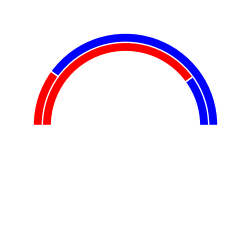

In [122]:
import nibabel as nib
import numpy as np
import pandas as pd
import nilearn.plotting as nip
import seaborn as sns
from matplotlib.colors import ListedColormap
from nibabel.affines import apply_affine
import numpy.linalg as npl
from nilearn.reporting import get_clusters_table

from nilearn.datasets import fetch_atlas_difumo
difumo_data = fetch_atlas_difumo(dimension=128, resolution_mm=2, data_dir=None, resume=True, verbose=1, legacy_format=False)
# load 4d image and fetch the first volume
difumo_4d = nib.load(difumo_data['maps'])

def get_difumo_label(word_coord):
    voxel_coord = apply_affine(npl.inv(difumo_4d.affine), word_coord).astype(int)
    max = np.max(difumo_4d.get_fdata()[voxel_coord[0], voxel_coord[1], voxel_coord[2], :])
    argmax = np.argmax(difumo_4d.get_fdata()[voxel_coord[0], voxel_coord[1], voxel_coord[2], :])
    location = difumo_data['labels'].iloc[argmax, :] 
    return location['difumo_names'], location['yeo_networks7'], max

dir_mediation = '/Users/tspisak/data/PIC_conditioning_withinsub_nodatalad/mediation_signflipped_signedquantile_studymod_results'
data4d_harmonized = nib.load(f'{dir_mediation}/../all_data_studyranked.nii')
pheno = pd.read_csv(f'{dir_mediation}/../signatures.csv')
# get mean effect in each group for a given voxel
def get_stats(voxel_coord, stat_fun, data4d=data4d_harmonized, pheno=pheno):
    data = data4d.get_fdata()[voxel_coord[0], voxel_coord[1], voxel_coord[2], :]
    return stat_fun(data, pheno)

def stat_fun_groupmeans(data, pheno):
    return np.mean(data[pheno['Conditioning']=='suggestions']), np.mean(data[pheno['Conditioning']=='suggestions & conditioning'])

def stat_fun_percgt0(data, pheno):
    mean_INT, mean_CONDINT = stat_fun_groupmeans(data, pheno)
    return (mean_INT+0.5)*100, (mean_CONDINT+0.5)*100 #weighted average (across studies) of the % of participants with a positive effect

def plot_freq(val_A, val_B):
    # plot a half circle, with 50% being in the middle, 0% to the left, 100% to the right
    import matplotlib.pyplot as plt
    # data
    # data
    #label = ["A", "B"]
    val_A = [1-val_A, val_A]
    val_B = [1-val_B, val_B]
    
    # append data and assign color
    #label.append("")
    val_A.append(sum(val_A))  # 50% blank
    val_B.append(sum(val_B))
    colors = ['blue', 'red']
    
    # plot
    fig = plt.figure(figsize=(3,3),dpi=100)
    
    wedges, labels=plt.pie(val_B, wedgeprops=dict(width=0.2,edgecolor='w'), colors=colors)
    wedges[-1].set_visible(False)
    wedges, labels=plt.pie(val_A, wedgeprops=dict(width=0.1,edgecolor='w'), colors=colors)
    wedges[-1].set_visible(False)
    #return fig

plot_freq(0.2, 0.8)

my_cmp = ListedColormap(['cyan', 'blue', 'white', 'white', 'red', 'orange'])

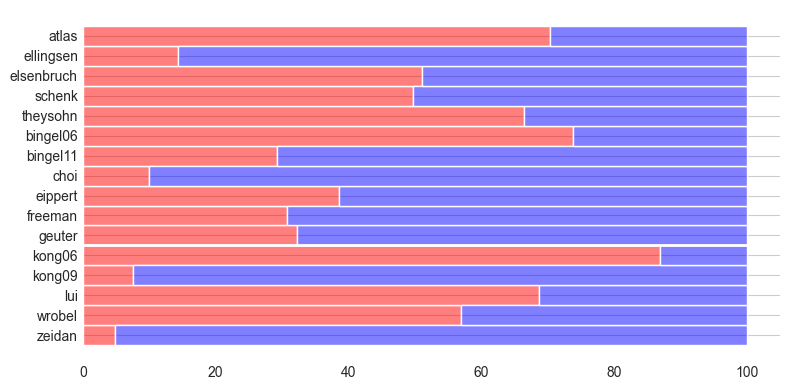

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
plt.style.use('seaborn-v0_8-whitegrid')

def bars(x, y, z):
    df = pd.DataFrame({'data': (data4d_harmonized.get_fdata()[x, y, z, :] + 0.5) * 100,
                       'data2': 100 - (data4d_harmonized.get_fdata()[x, y, z, :] + 0.5) * 100,
                       'study': pheno['Study_ID'],
                       'induction': pheno['Conditioning']}).groupby(['induction', 'study']).mean(numeric_only=True).iloc[::-1]

    #return df
    #color = [(1,0,0)]*(df.index.get_level_values("induction")=='suggestions').sum()
    #color += [(0,0,1)]*(df.index.get_level_values("induction")=='suggestions & conditioning').sum()

    #return color
    fig = plt.figure(figsize=(8, 4)) #(4, 2.6)
    plt.axes().grid(axis='x')
    red = to_rgba('red', 0.5)
    blue = to_rgba('blue', 0.5)
    bar = plt.barh(df.index.get_level_values("study"), df['data'], height=1.0, color=to_rgba('red', 0.5))
    bar = plt.barh(df.index.get_level_values("study"), df['data2'], left=df['data'], height=1.0, color=blue)
    plt.axhline((df.index.get_level_values("induction")=='suggestions').sum()-0.5, color='white', linewidth=2)

    # Adjust the plot to have no gap between bars
    #bar1.set_yticks(range(len(df['study'].unique())))
    #bar1.set_xticklabels(df['study'].unique(), rotation=90)
    #bar1.set_yticklabels(df['study'].unique(), rotation=0)

    plt.tight_layout()
    sns.despine(left=True, bottom=True)

# Call the function with your specific coordinates
bars(50, 50, 50)

In [80]:
df.index.get_level_values("induction")

Index(['suggestions', 'suggestions', 'suggestions', 'suggestions',
       'suggestions', 'suggestions & conditioning',
       'suggestions & conditioning', 'suggestions & conditioning',
       'suggestions & conditioning', 'suggestions & conditioning',
       'suggestions & conditioning', 'suggestions & conditioning',
       'suggestions & conditioning', 'suggestions & conditioning',
       'suggestions & conditioning', 'suggestions & conditioning'],
      dtype='object', name='induction')

In [3]:
!ls {dir_mediation}

beta_CONDINST_mean.nii.gz
beta_Direct(Total-Indirect).nii.gz
beta_INST_mean.nii.gz
beta_INSTandCONDINST.nii.gz
beta_Indirect(ACME).nii.gz
beta_PathA(XM).nii.gz
beta_PathB(MY).nii.gz
fdr_logq_CONDINST_mean.nii.gz
fdr_logq_Direct(Total-Indirect).nii.gz
fdr_logq_INST_mean.nii.gz
fdr_logq_INSTandCONDINST.nii.gz
fdr_logq_Indirect(ACME).nii.gz
fdr_logq_PathA(XM).nii.gz
fdr_logq_PathB(MY).nii.gz
thres_CONDINST_mean.nii.gz
thres_Direct(Total-Indirect).nii.gz
thres_INST_mean.nii.gz
thres_INSTandCONDINST.nii.gz
thres_Indirect(ACME).nii.gz
thres_PathA(XM).nii.gz
thres_PathB(MY).nii.gz
uncorr_logp_CONDINST_mean.nii.gz
uncorr_logp_Direct(Total-Indirect).nii.gz
uncorr_logp_INST_mean.nii.gz
uncorr_logp_INSTandCONDINST.nii.gz
uncorr_logp_Indirect(ACME).nii.gz
uncorr_logp_PathA(XM).nii.gz
uncorr_logp_PathB(MY).nii.gz


In [4]:
mask = nib.load(f'{dir_mediation}/../full_masked_10_percent.nii')
mask_data = mask.get_fdata()

contrast = [
    "PathA(XM)",
    "PathB(MY)",
    "Indirect(ACME)",
    "Direct(Total-Indirect)",
    "INST_mean",
    "CONDINST_mean",
    "INSTandCONDINST",
    ]
img_type = ['beta', 'thres', 'uncorr_logp', 'fdr_logq']

img = {}
for c in contrast:
    img[c] = {}
    for t in img_type:
        img[c][t] = nib.load(f'{dir_mediation}/{t}_{c}.nii.gz')

In [ ]:
# Nichols' conjunction
img['INST_mean']['uncorr_logp']

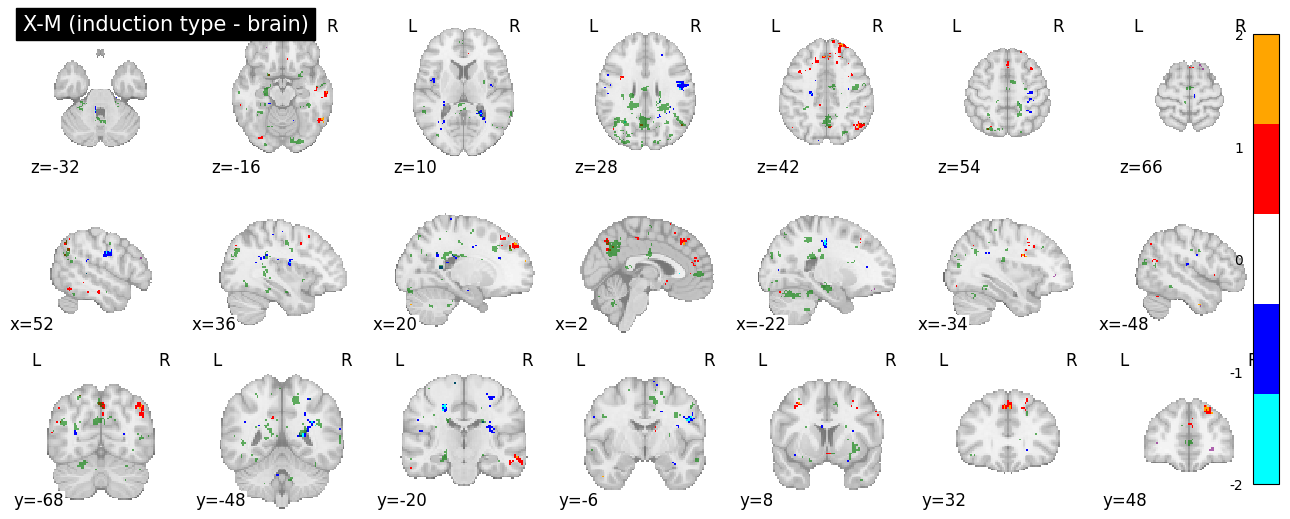

In [5]:
# X-M
disp = nip.plot_stat_map(img['PathA(XM)']['thres'], cmap=my_cmp, display_mode='mosaic', title='X-M (induction type - brain)', vmin=-2, vmax=2)
#disp.add_contours(img['INSTandCONDINST']['thres'], colors="black", filled=False, linewidths=0.1)
disp.add_overlay(img['INSTandCONDINST']['thres'], alpha=0.6, vmin=-2, vmax=2, cmap=ListedColormap(['green', 'green', 'white', 'white', 'purple', 'purple']))


/Users/tspisak/src/placebo-conditioning-meta-analysis/venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



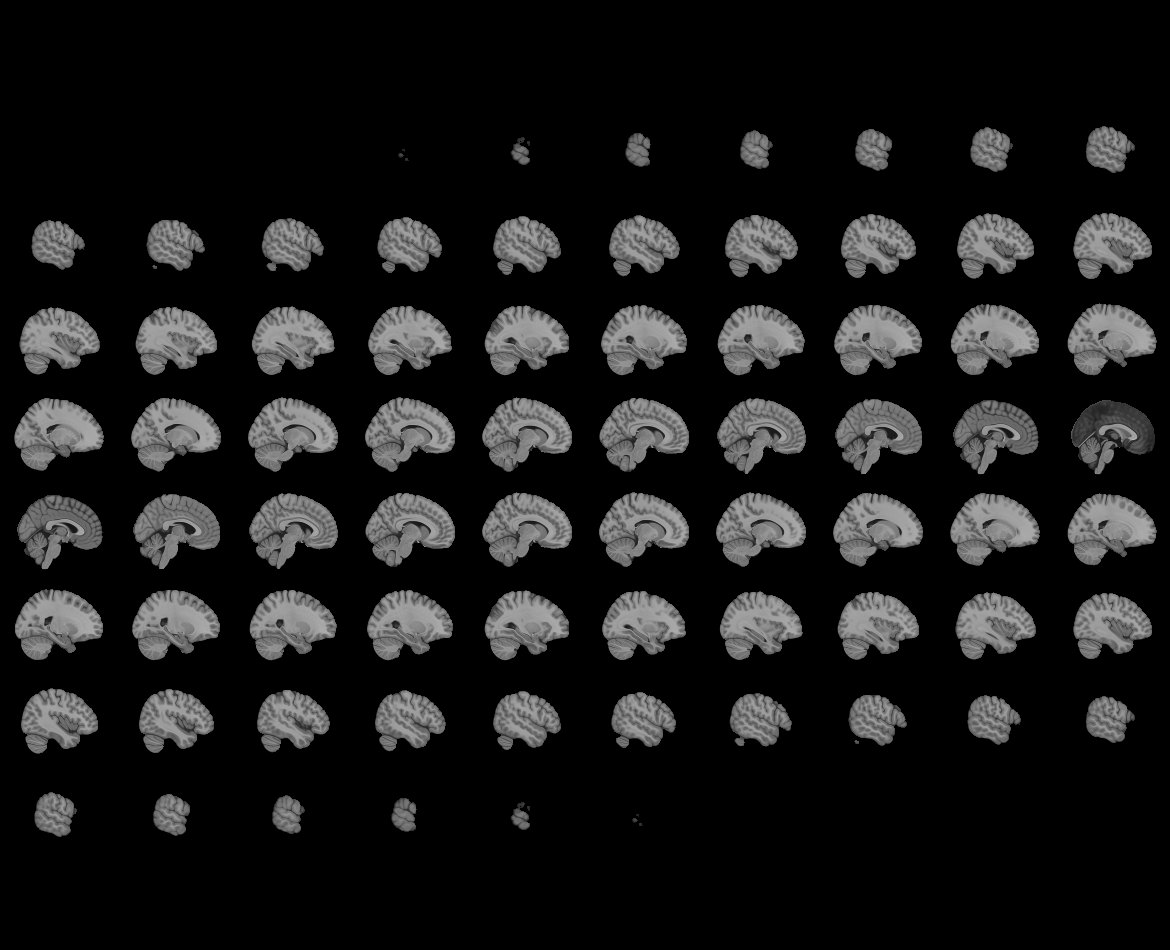
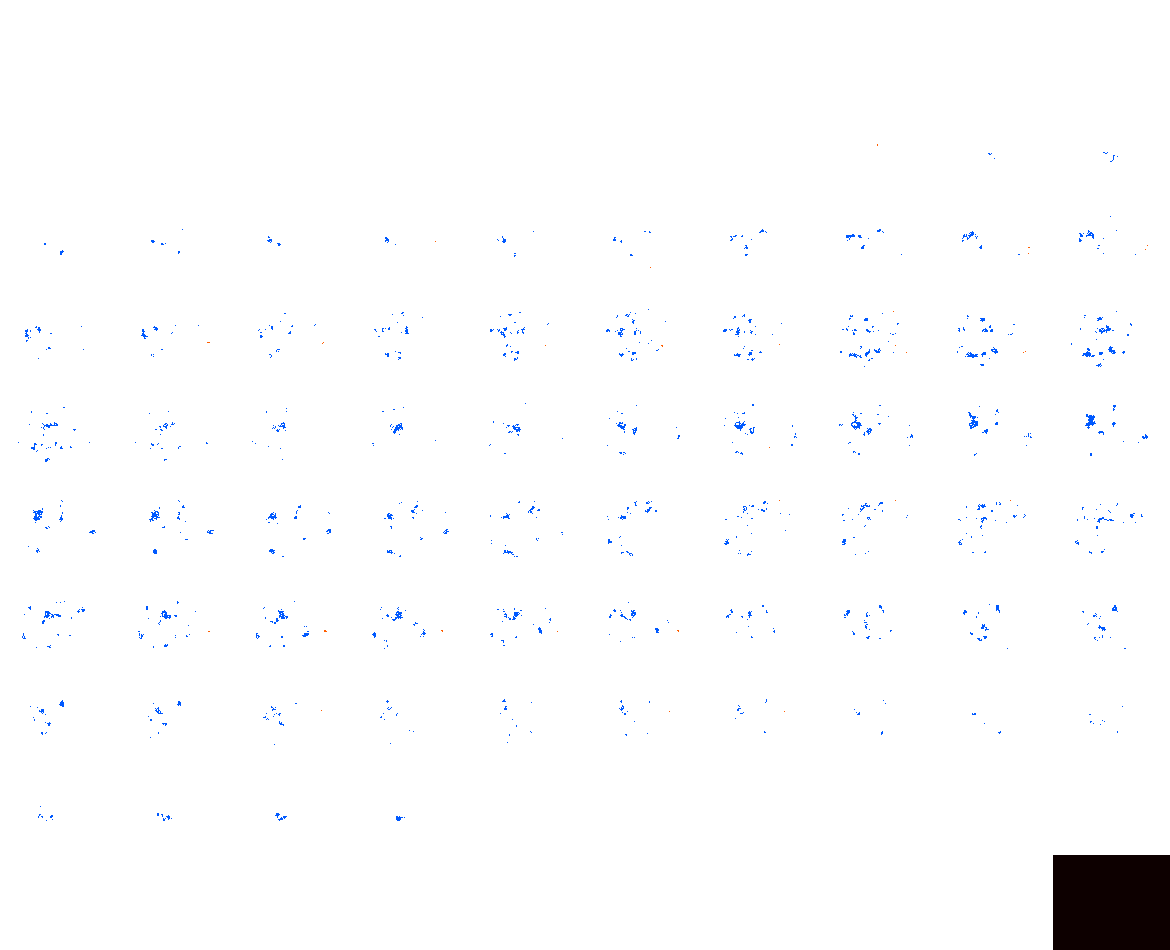

In [6]:
nip.view_img(img['INSTandCONDINST']['thres'])

/Users/tspisak/src/placebo-conditioning-meta-analysis/venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



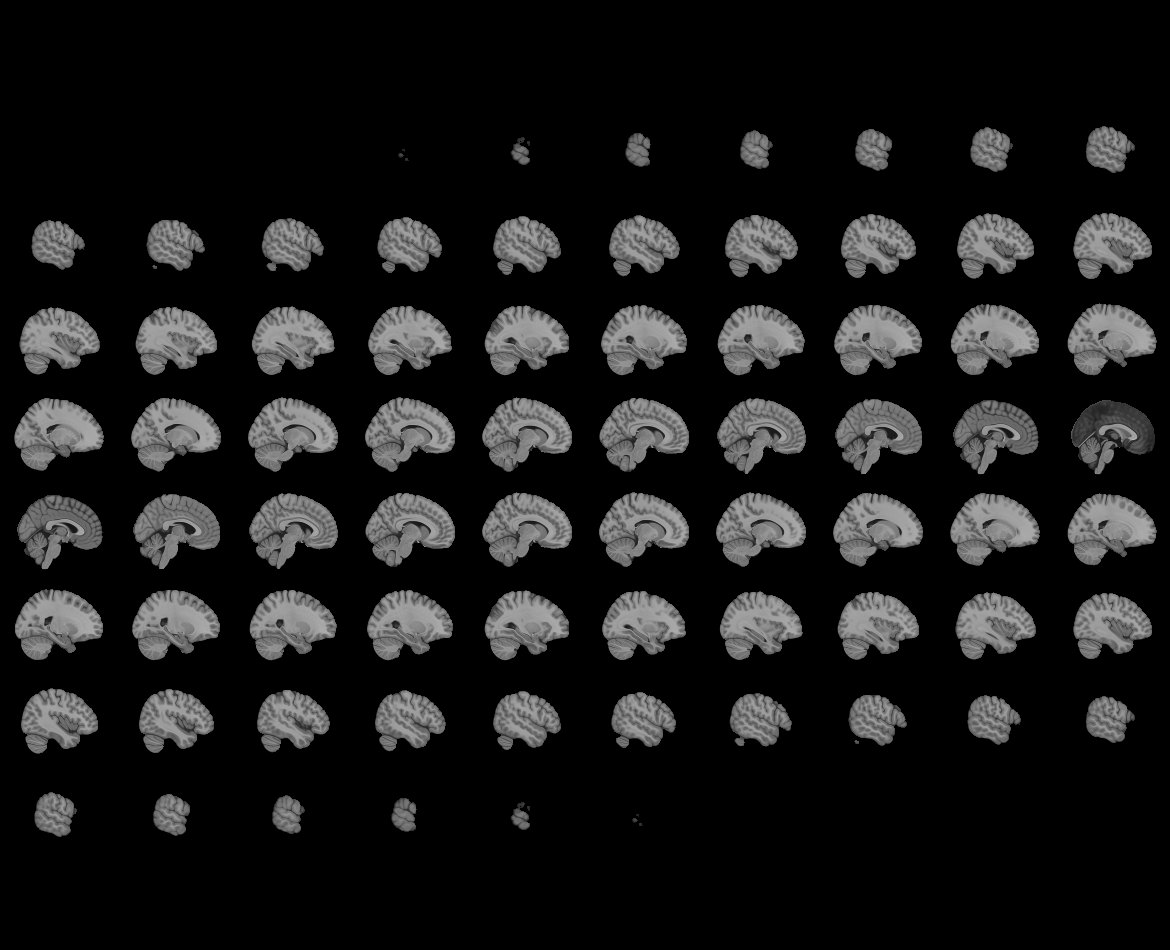
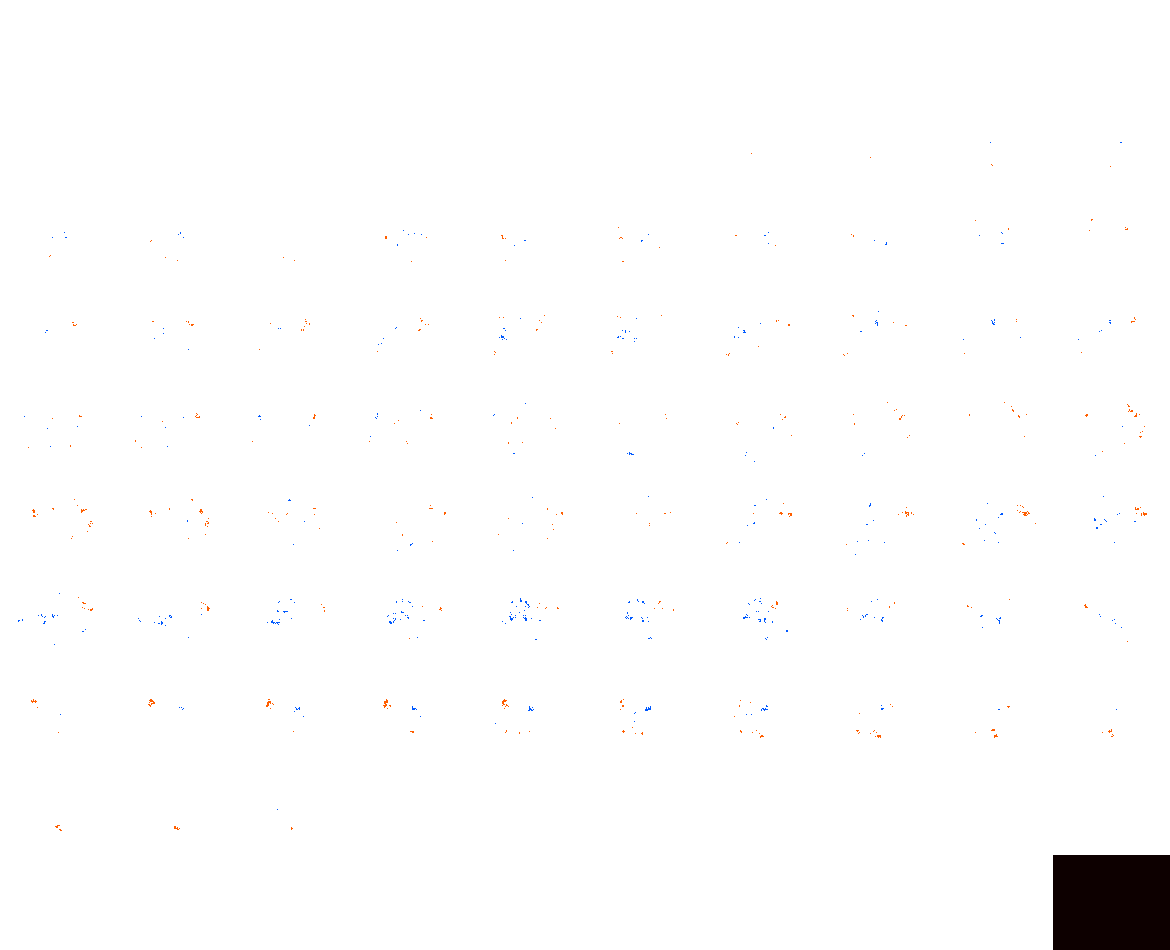

In [7]:
nip.view_img(img['PathA(XM)']['thres'])

/Users/tspisak/src/placebo-conditioning-meta-analysis/venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



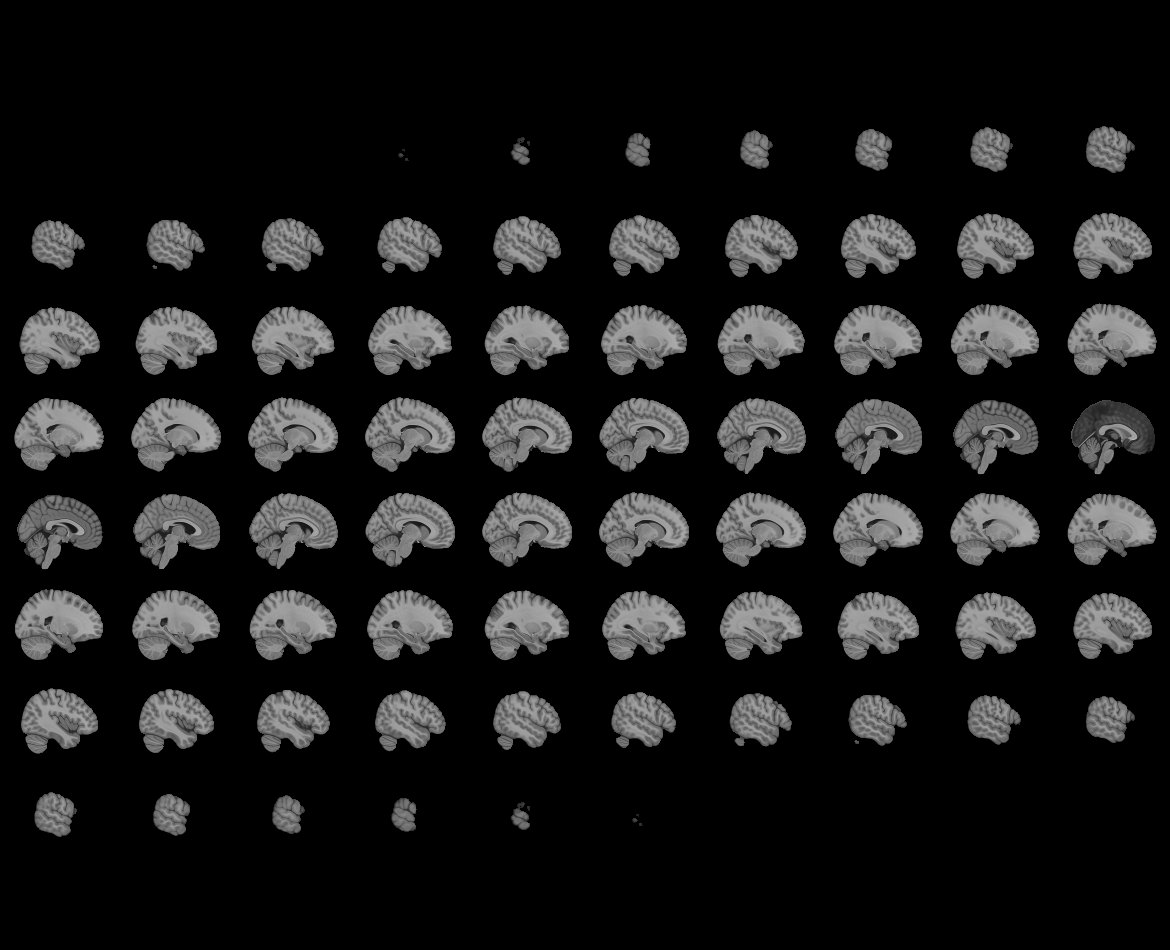
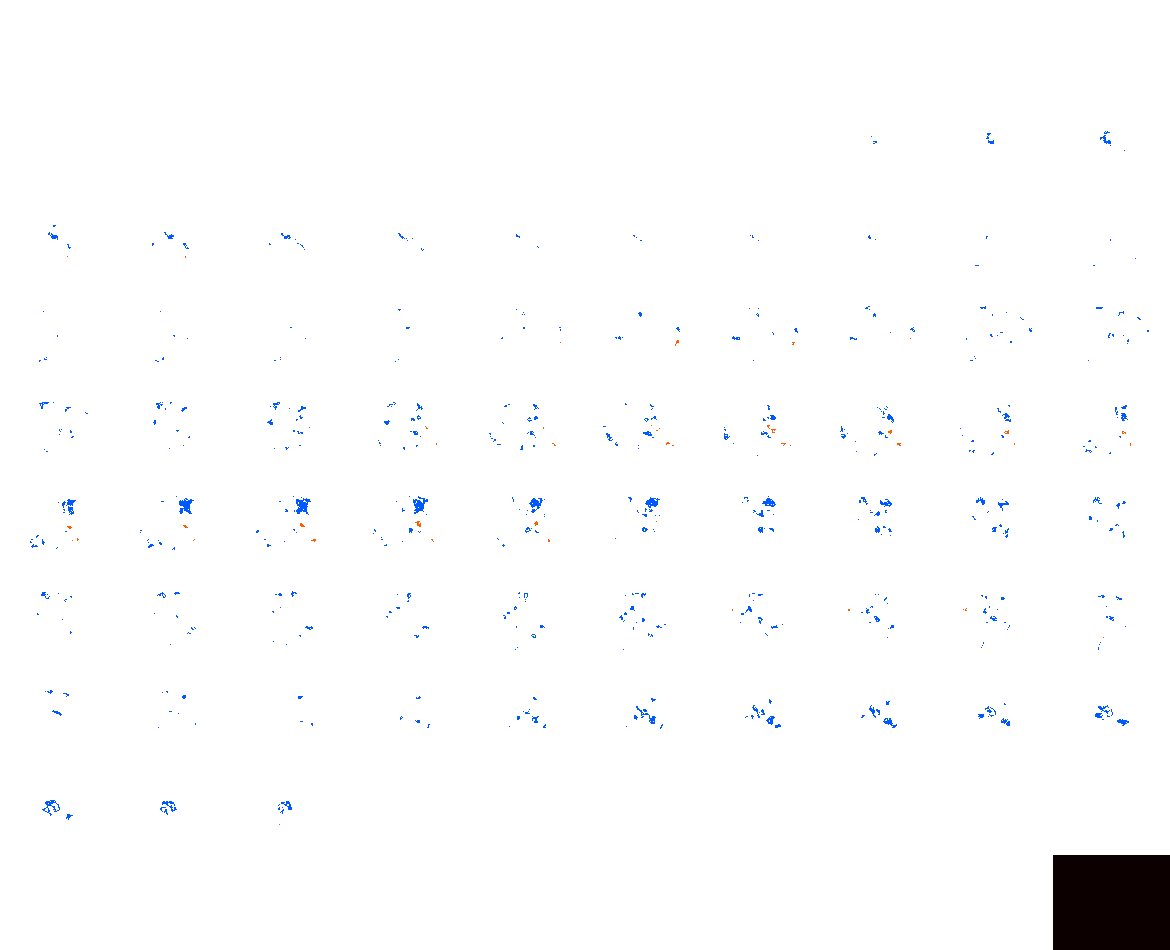

In [8]:
nip.view_img(img['PathB(MY)']['thres'])

/Users/tspisak/src/placebo-conditioning-meta-analysis/venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



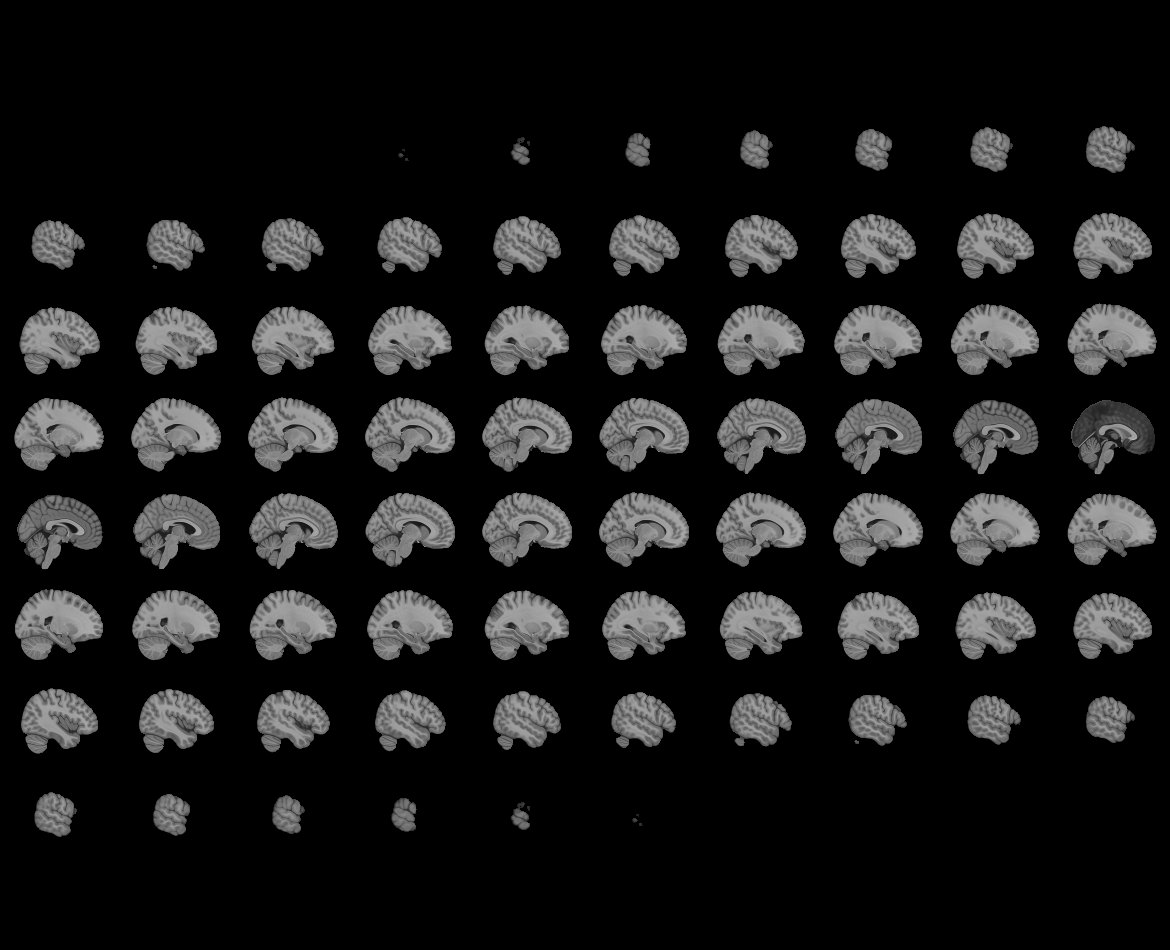
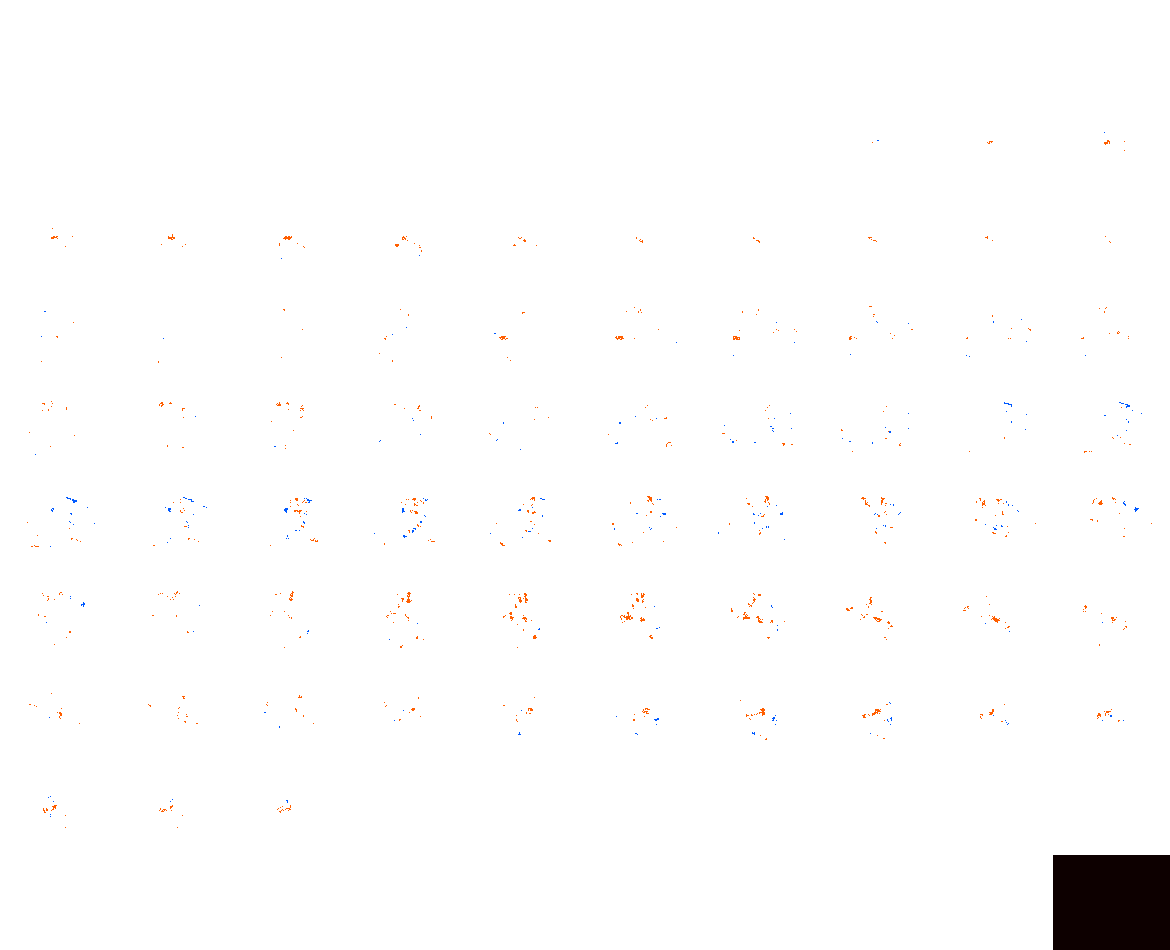

In [9]:
nip.view_img(img['Indirect(ACME)']['thres'])

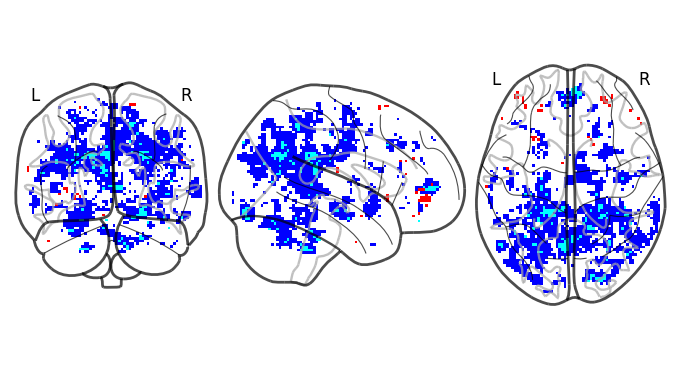

In [10]:
nip.plot_glass_brain(img['INSTandCONDINST']['thres'], plot_abs=False, cmap=my_cmp)

In [106]:
# search for slices with fdr
def fdr_slices(contrast, n_sign=4):
    data = img[contrast]['thres'].get_fdata()
    zcoords = []
    for i in range(data.shape[2]):
        if np.sum(np.abs(data[:,:,i])==2)>=n_sign:
            #print(i, np.min(data[:,:,i]), np.max(data[:,:,i]), np.sum(np.abs(data[:,:,i])==2))
            # convert to world coordinate
            x, y, z = apply_affine(img[contrast]['thres'].affine, (0, 0, i))
            zcoords.append(z)
    zcoords = ' '.join(str(z) for z in zcoords)
    print(f'A H -0.1 V -0.1 {zcoords} S X R 0')
    #return np.min(data), np.max(data)
    
fdr_slices('INSTandCONDINST', 5)
fdr_slices('PathA(XM)', 4)
fdr_slices('PathB(MY)', 6)
fdr_slices('Indirect(ACME)', 6)




A H -0.1 V -0.1 -44.0 -20.0 -14.0 2.0 4.0 14.0 16.0 24.0 26.0 28.0 30.0 52.0 S X R 0
A H -0.1 V -0.1 -16.0 26.0 28.0 30.0 40.0 42.0 44.0 46.0 S X R 0
A H -0.1 V -0.1 -14.0 4.0 6.0 8.0 10.0 12.0 16.0 18.0 20.0 22.0 24.0 26.0 28.0 30.0 32.0 34.0 44.0 58.0 62.0 64.0 66.0 68.0 70.0 S X R 0
A H -0.1 V -0.1 16.0 18.0 24.0 26.0 68.0 S X R 0


In [62]:
clust_table = get_clusters_table(stat_img=img['PathA(XM)']['uncorr_logp'],
                                 stat_threshold=-np.log10(0.01),
                                 cluster_threshold=10,
                                 min_distance=20
                                 )

clust_table['region'] = 'N/A'
clust_table['yeo_network'] = 'N/A'

for i, row in clust_table.iterrows():
    x, y, z = row['X'], row['Y'], row['Z']
    x_vox, y_vox, z_vox = apply_affine(npl.inv(img['PathA(XM)']['beta'].affine), (x, y, z)).astype(int)
    clust_table.loc[row.name, 'Effect size'] = img['PathA(XM)']['beta'].get_fdata()[x_vox, y_vox, z_vox]
    clust_table.loc[row.name, 'Direction'] = np.sign(clust_table.loc[row.name, 'Effect size'])
    
    clust_table.loc[row.name, 'Mean INST'] = img['INST_mean']['thres'].get_fdata()[x_vox, y_vox, z_vox]+0.5
    clust_table.loc[row.name, 'Mean COND'] = img['CONDINST_mean']['thres'].get_fdata()[x_vox, y_vox, z_vox]+0.5

    region, yeo_nw, prob = get_difumo_label([x, y, z])
    clust_table.loc[row.name, 'region'] = region
    clust_table.loc[row.name, 'yeo_network'] = yeo_nw

    clust_table.loc[row.name, 'Peak Stat'] = 10 ** (-row['Peak Stat'])
    if clust_table.loc[row.name, 'Peak Stat'] < 0.0001:
        clust_table.loc[row.name, 'Peak Stat'] = '<0.0001'

    ### specific for path A
    pgt0_INT, pgt0_CONDINT = get_stats(voxel_coord=(x_vox, y_vox, z_vox), stat_fun=stat_fun_percgt0)
    # weighted average (across studies) of the % of participants with a positive effect
    clust_table.loc[row.name, 'perc_gt0_INT'] = pgt0_INT
    clust_table.loc[row.name, 'perc_gt0_CONDINT'] = pgt0_CONDINT
    # difference in % of participants with a positive effect - when modelling sex and age
    clust_table.loc[row.name, 'perc_gt0_diff'] = pgt0_CONDINT - pgt0_INT

clust_table.sort_values(by='Direction', ascending=False)[['Cluster ID', 'X', 'Y', 'Z', 'Mean INST', 'Mean COND',
     'Effect size', 'Peak Stat', 'Cluster Size (mm3)', 'region', 'yeo_network', ]]

Cluster ID     X     Y     Z  Mean INST  Mean COND  Effect size  \
0            1  60.0 -24.0 -16.0        0.5        0.5     0.182661   
14          15  56.0 -56.0 -16.0        0.5        0.5     0.190159   
28          29   8.0  54.0  42.0        0.5        0.5     0.181089   
27          28  34.0  14.0  52.0        0.5        0.5     0.164452   
26          27   4.0 -68.0  42.0        0.5        0.5     0.175744   
24          25 -20.0  26.0  44.0        0.5        0.5     0.160010   
23          24  20.0  34.0  48.0        0.5        0.5     0.169241   
22          23  14.0  24.0  40.0        0.5        0.5     0.174603   
19          20 -50.0 -66.0  22.0       -0.5        0.5     0.188755   
16          17  50.0 -64.0  44.0       -0.5        0.5     0.179655   
1            2 -34.0   2.0  28.0        0.5        0.5     0.201714   
15          16  48.0 -58.0  36.0        0.5        0.5     0.163304   
7            8   2.0  30.0  44.0        0.5        0.5     0.156200   
10          11  28.0  44.0  38.0        0.5        0.5     0.169594   
4            5 -12.0  28.0  40.0        0.5        0.5     0.172234   
8            9 -38.0  14.0  36.0        0.5        0.5     0.166536   
6            7  -2.0  18.0  58.0        0.5        0.5     0.180595   
12          13  32.0 -20.0  52.0        0.5        0.5    -0.160075   
2            3 -28.0 -68.0  12.0        0.5        0.5    -0.176996   
3            4 -22.0 -20.0  44.0        0.5        0.5    -0.212645   
25          26  22.0 -30.0  26.0        0.5       -0.5    -0.148827   
5            6  -6.0 -44.0 -30.0        0.5        0.5    -0.183310   
21          22  38.0  -8.0  16.0        0.5        0.5    -0.156944   
13          14  58.0  -8.0  28.0        0.5        0.5    -0.160193   
20          21  32.0 -20.0  16.0        0.5        0.5    -0.172802   
18          19  30.0 -32.0  32.0        0.5        0.5    -0.164279   
17          18  34.0 -48.0  26.0        0.5        0.5    -0.183367   
9           10  28.0 -60.0  12.0        0.5        0.5    -0.156262   
11          12  24.0 -48.0  12.0        0.5       -0.5    -0.184421   
29          30  30.0 -30.0  56.0        0.5        0.5    -0.186168   

    Peak Stat  Cluster Size (mm3)                            region  \
0    0.000999                 616          Middle temporal gyrus RH   
14   0.000999                 168  Occipitotemporal gyrus posterior   
28   0.002997                  80  Superior frontal sulcus anterior   
27   0.001998                  96  Superior frontal gyrus posterior   
26   0.001998                 200               Precuneus posterior   
24   0.001998                  88           Superior frontal sulcus   
23   0.001998                 104           Superior frontal sulcus   
22   0.001998                  80   Middle frontal gyrus lateral LH   
19   0.000999                 104            Angular gyrus inferior   
16   0.000999                 944         Angular gyrus superior RH   
1    0.000999                 104     Precentral sulcus inferior LH   
15   0.000999                 104         Angular gyrus superior RH   
7    0.000999                 320        Paracingulate gyrus middle   
10   0.000999                 816           Superior frontal sulcus   
4    0.000999                 160        Paracingulate gyrus middle   
8    0.000999                 144   Middle frontal gyrus lateral LH   
6    0.000999                  88        Paracingulate gyrus middle   
12   0.000999                 112              Postcentral gyrus RH   
2    0.000999                 104   Middle frontal gyrus lateral LH   
3    0.000999                 240   Middle frontal gyrus lateral LH   
25   0.001998                 104   Middle frontal gyrus lateral LH   
5    0.000999                 112   Middle frontal gyrus lateral LH   
21   0.001998                 176          Central operculum cortex   
13   0.000999                 648                    Central sulcus   
20   0.000999              

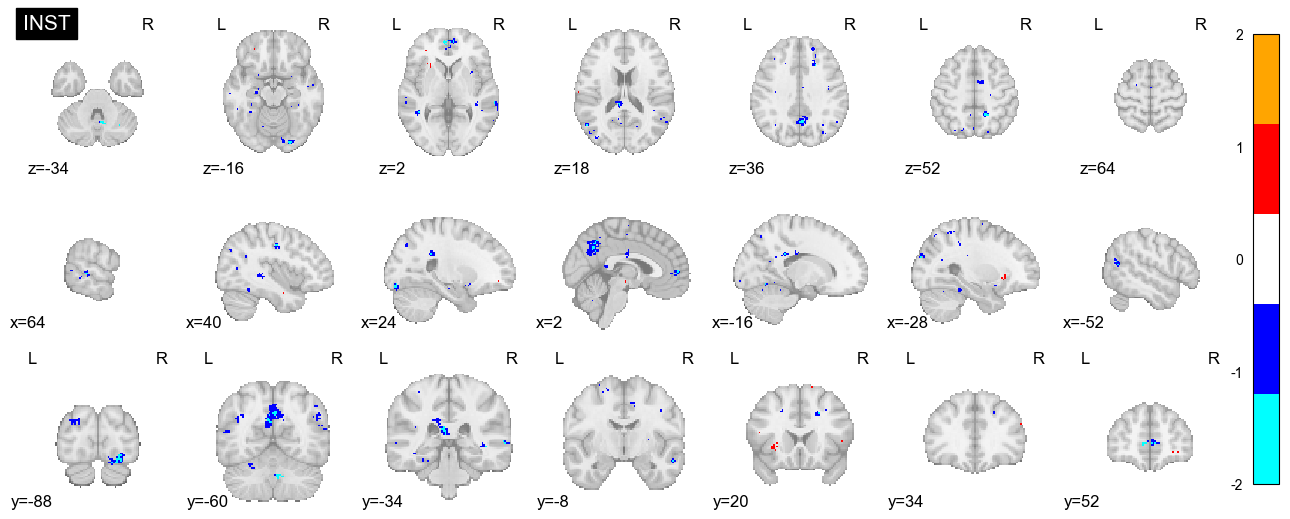

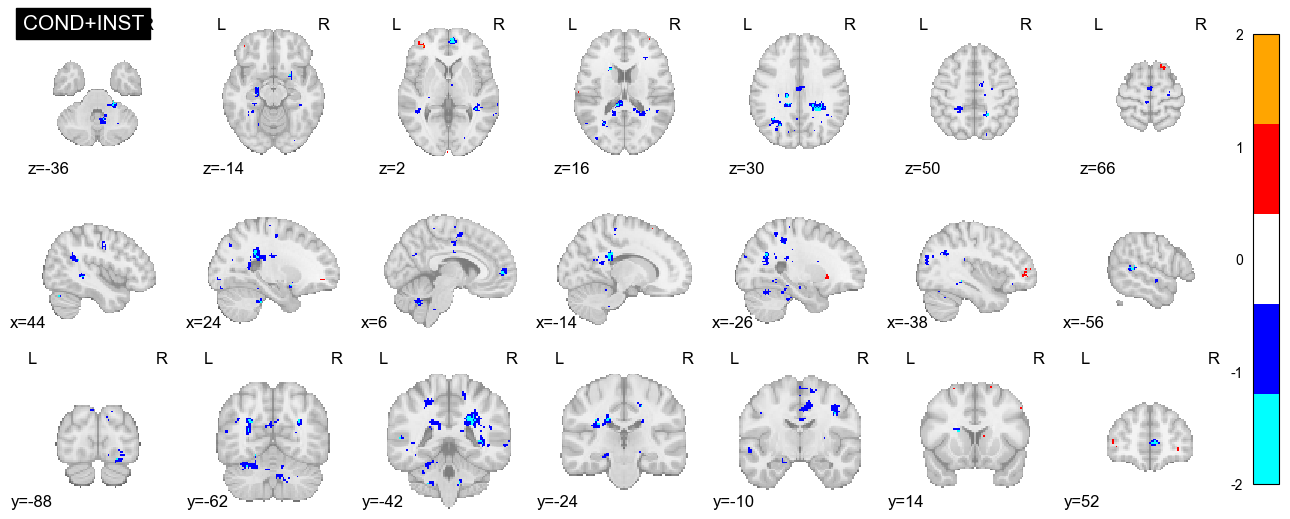

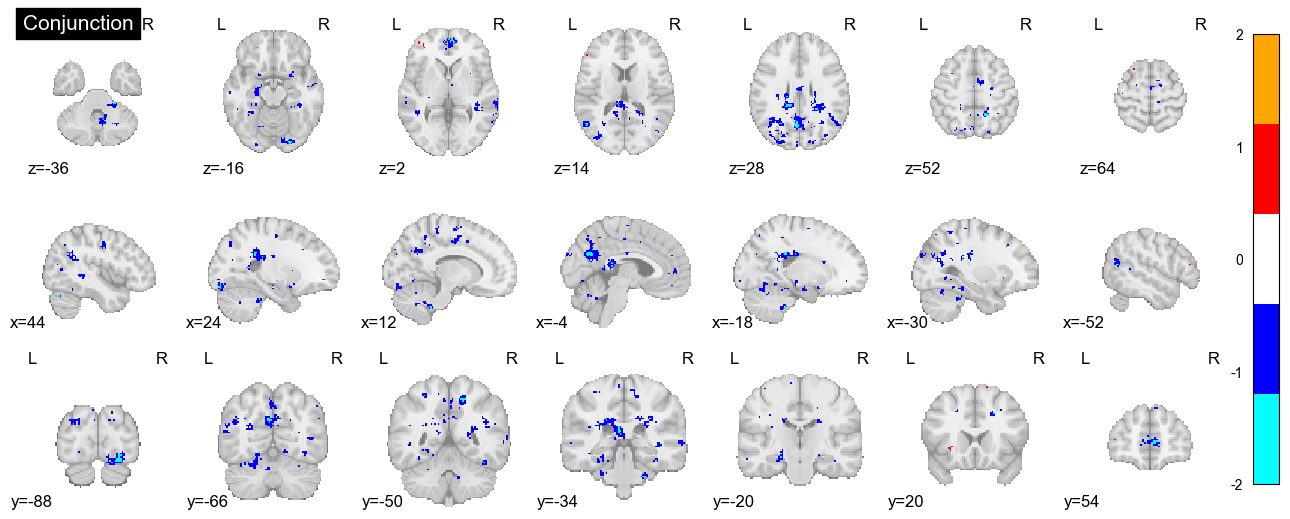

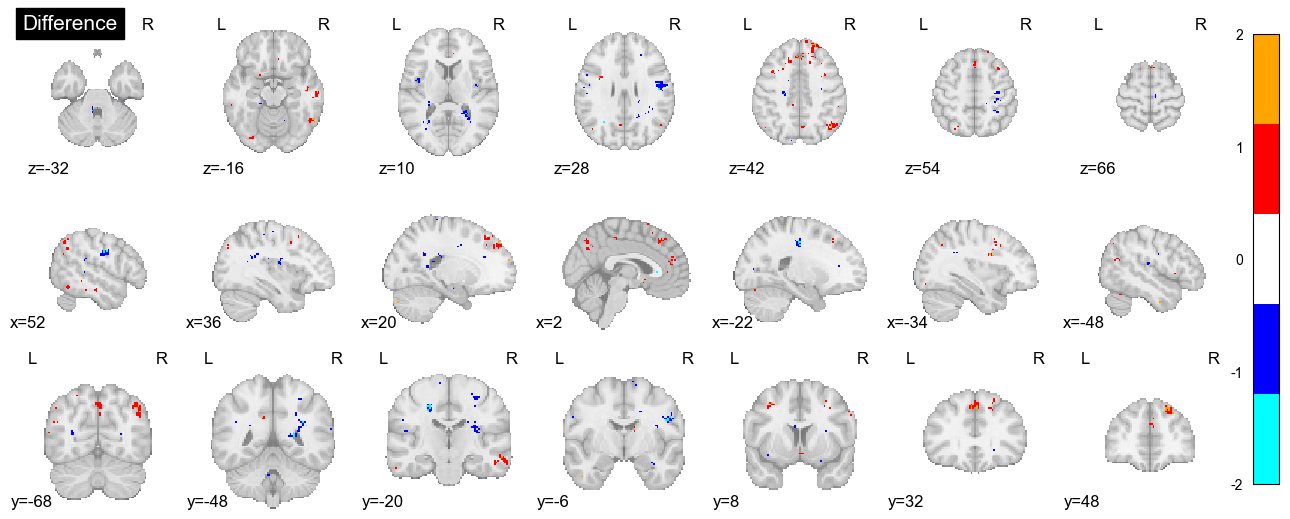

In [12]:
# means
img = nib.load(f'{dir_mediation}/thres_INST_mean.nii.gz')
my_cmp = ListedColormap(['cyan', 'blue', 'white', 'white', 'red', 'orange'])
nip.plot_stat_map(img, cmap=my_cmp, display_mode='mosaic', title='INST', vmin=-2, vmax=2)

img = nib.load(f'{dir_mediation}/thres_CONDINST_mean.nii.gz')
my_cmp = ListedColormap(['cyan', 'blue', 'white', 'white', 'red', 'orange'])
nip.plot_stat_map(img, cmap=my_cmp, display_mode='mosaic', title='COND+INST', vmin=-2, vmax=2)

img = nib.load(f'{dir_mediation}/thres_INSTandCONDINST.nii.gz')
my_cmp = ListedColormap(['cyan', 'blue', 'white', 'white', 'red', 'orange'])
nip.plot_stat_map(img, cmap=my_cmp, display_mode='mosaic', title='Conjunction', vmin=-2, vmax=2)

img = nib.load(f'{dir_mediation}/thres_PathA(XM).nii.gz')
my_cmp = ListedColormap(['cyan', 'blue', 'white', 'white', 'red', 'orange'])
nip.plot_stat_map(img, cmap=my_cmp, display_mode='mosaic', title='Difference', vmin=-2, vmax=2)

In [70]:
beta = nib.load(f'{dir_mediation}/beta_INSTandCONDINST.nii.gz')
beta_INST = nib.load(f'{dir_mediation}/beta_INST_mean.nii.gz')
beta_CONDINST = nib.load(f'{dir_mediation}/beta_CONDINST_mean.nii.gz')
clust_table = get_clusters_table(stat_img=nib.load(f'{dir_mediation}/fdr_logq_INSTandCONDINST.nii.gz'),
                                 stat_threshold=-np.log10(0.05),
                                 cluster_threshold=0,
                                 min_distance=20
                                 )
clust_table['region'] = 'N/A'
clust_table['yeo_network'] = 'N/A'

for i, row in clust_table.iterrows():
    x, y, z = row['X'], row['Y'], row['Z']
    x_vox, y_vox, z_vox = apply_affine(npl.inv(beta.affine), (x, y, z)).astype(int)
    clust_table.loc[row.name, 'Effect size'] = beta.get_fdata()[x_vox, y_vox, z_vox]+0.5
    clust_table.loc[row.name, 'Direction'] = np.sign(clust_table.loc[row.name, 'Effect size'])
    
    clust_table.loc[row.name, 'Mean INST'] = beta_INST.get_fdata()[x_vox, y_vox, z_vox]+0.5
    clust_table.loc[row.name, 'Mean COND'] = beta_CONDINST.get_fdata()[x_vox, y_vox, z_vox]+0.5

    region, yeo_nw, prob = get_difumo_label([x, y, z])
    clust_table.loc[row.name, 'region'] = region
    clust_table.loc[row.name, 'yeo_network'] = yeo_nw

    clust_table.loc[row.name, 'Peak Stat'] = 10 ** (-row['Peak Stat'])
    if clust_table.loc[row.name, 'Peak Stat'] < 0.0001:
        clust_table.loc[row.name, 'Peak Stat'] = '<0.0001'

    ### specific for path A
    pgt0_INT, pgt0_CONDINT = get_stats(voxel_coord=(x_vox, y_vox, z_vox), stat_fun=stat_fun_percgt0)
    # weighted average (across studies) of the % of participants with a positive effect
    clust_table.loc[row.name, 'perc_gt0_INT'] = pgt0_INT
    clust_table.loc[row.name, 'perc_gt0_CONDINT'] = pgt0_CONDINT
    # difference in % of participants with a positive effect - when modelling sex and age
    clust_table.loc[row.name, 'perc_gt0_diff'] = pgt0_CONDINT - pgt0_INT

clust_table.sort_values(by='Direction', ascending=False)[
    ['Cluster ID', 'X', 'Y', 'Z', 'Mean INST', 'Mean COND',
     'Effect size', 'Peak Stat', 'Cluster Size (mm3)', 'region', 'yeo_network', ]]

/var/folders/rc/b4064_3d4dj60wt9y_447fyr0000gn/T/ipykernel_31788/924477332.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<0.0001' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  clust_table.loc[row.name, 'Peak Stat'] = '<0.0001'


Cluster ID     X     Y     Z  Mean INST  Mean COND  Effect size Peak Stat  \
0            1  54.0 -10.0 -20.0   0.234336   0.367280     0.234336   <0.0001   
49          50 -22.0 -38.0  26.0   0.322190   0.224481     0.224481   <0.0001   
56          57  24.0 -32.0  24.0   0.378103   0.248168     0.248168  0.001121   
55          56 -20.0 -40.0 -44.0   0.325732   0.221205     0.221205  0.000928   
54          55 -14.0 -40.0  26.0   0.262253   0.212368     0.212368  0.000173   
..         ...   ...   ...   ...        ...        ...          ...       ...   
25          26 -34.0 -56.0  32.0   0.253974   0.240928     0.240928   <0.0001   
24          25 -32.0 -40.0 -30.0   0.321667   0.243395     0.243395   <0.0001   
23          24 -30.0 -38.0 -30.0   0.306855   0.251415     0.251415   <0.0001   
22          23 -28.0 -50.0  56.0   0.237580   0.220936     0.220936   <0.0001   
76          77 -20.0 -36.0  26.0   0.308765   0.230671     0.230671  0.047179   

    Cluster Size (mm3)                           region       yeo_network  
0                    8         Middle temporal gyrus RH          DefaultB  
49                   8  Middle frontal gyrus lateral LH             ContA  
56                   8  Middle frontal gyrus lateral LH             ContA  
55                   8  Middle frontal gyrus lateral LH             ContA  
54                  24  Middle frontal gyrus lateral LH             ContA  
..                 ...                              ...               ...  
25                   8  Middle frontal gyrus lateral LH             ContA  
24                   8                    Cerebellum VI  No network found  
23                   8                    Cerebellum VI  No network found  
22                   8         Superior parietal sulcus         DorsAttnB  
76                   8  Middle frontal gyrus lateral LH             ContA  

[77 rows x 11 columns]

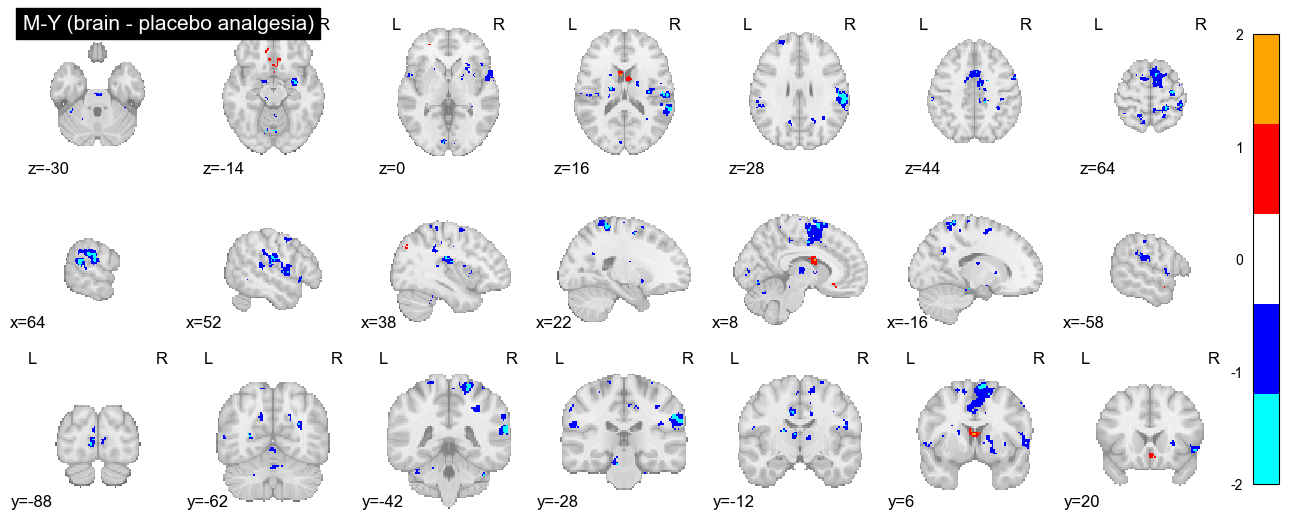

In [14]:
# M-Y
img = nib.load(f'{dir_mediation}/thres_PathB(MY).nii.gz')
my_cmp = ListedColormap(['cyan', 'blue', 'white', 'white', 'red', 'orange'])
nip.plot_stat_map(img, cmap=my_cmp, display_mode='mosaic', title='M-Y (brain - placebo analgesia)', vmin=-2, vmax=2)

In [71]:
beta_INST = nib.load(f'{dir_mediation}/beta_INST_mean.nii.gz')
beta_CONDINST = nib.load(f'{dir_mediation}/beta_CONDINST_mean.nii.gz')
beta = nib.load(f'{dir_mediation}/beta_PathB(MY).nii.gz')
clust_table = get_clusters_table(stat_img=nib.load(f'{dir_mediation}/fdr_logq_PathB(MY).nii.gz'),
                   stat_threshold=-np.log10(0.05),
                   cluster_threshold=0,
                   #min_distance=20
                   ) 
clust_table['region'] = 'N/A'
clust_table['yeo_network'] = 'N/A'

for i, row in clust_table.iterrows():
    x, y, z = row['X'], row['Y'], row['Z']
    x_vox, y_vox, z_vox = apply_affine(npl.inv(beta.affine), (x, y, z)).astype(int)
    clust_table.loc[row.name, 'Effect size'] = beta.get_fdata()[x_vox, y_vox, z_vox]+0.5
    clust_table.loc[row.name, 'Direction'] = np.sign(clust_table.loc[row.name, 'Effect size'])
    
    clust_table.loc[row.name, 'Mean INST'] = beta_INST.get_fdata()[x_vox, y_vox, z_vox]+0.5
    clust_table.loc[row.name, 'Mean COND'] = beta_CONDINST.get_fdata()[x_vox, y_vox, z_vox]+0.5

    region, yeo_nw, prob = get_difumo_label([x, y, z])
    clust_table.loc[row.name, 'region'] = region
    clust_table.loc[row.name, 'yeo_network'] = yeo_nw

    clust_table.loc[row.name, 'Peak Stat'] = 10 ** (-row['Peak Stat'])
    if clust_table.loc[row.name, 'Peak Stat'] < 0.0001:
        clust_table.loc[row.name, 'Peak Stat'] = '<0.0001'

    ### specific for path A
    pgt0_INT, pgt0_CONDINT = get_stats(voxel_coord=(x_vox, y_vox, z_vox), stat_fun=stat_fun_percgt0)
    # weighted average (across studies) of the % of participants with a positive effect
    clust_table.loc[row.name, 'perc_gt0_INT'] = pgt0_INT
    clust_table.loc[row.name, 'perc_gt0_CONDINT'] = pgt0_CONDINT
    # difference in % of participants with a positive effect - when modelling sex and age
    clust_table.loc[row.name, 'perc_gt0_diff'] = pgt0_CONDINT - pgt0_INT

clust_table.sort_values(by='Direction', ascending=False)[
    ['Cluster ID', 'X', 'Y', 'Z', 'Mean INST', 'Mean COND',
     'Effect size', 'Peak Stat', 'Cluster Size (mm3)', 'region', 'yeo_network', ]]

/var/folders/rc/b4064_3d4dj60wt9y_447fyr0000gn/T/ipykernel_31788/3071344355.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<0.0001' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  clust_table.loc[row.name, 'Peak Stat'] = '<0.0001'


Cluster ID     X     Y     Z  Mean INST  Mean COND  Effect size Peak Stat  \
113        111 -12.0  14.0  22.0   0.328637   0.330674     9.236889  0.047799   
10          11   0.0   6.0  12.0   0.463083   0.469600     9.614880   <0.0001   
28          29 -56.0   2.0 -20.0   0.489759   0.519034     7.302332   <0.0001   
13          14  -6.0   8.0  16.0   0.637769   0.573338     8.797415   <0.0001   
108        106   8.0   2.0  20.0   0.422311   0.408247     8.659495   0.04599   
..         ...   ...   ...   ...        ...        ...          ...       ...   
36          37  22.0 -42.0  66.0   0.445813   0.426274    -9.427695   <0.0001   
35          36  50.0   2.0  50.0   0.432031   0.413905    -8.189927   <0.0001   
34          35  52.0  -4.0   4.0   0.415843   0.445815    -8.333283   <0.0001   
33          34  66.0 -40.0  12.0   0.470405   0.461832    -8.200945   <0.0001   
57          55   2.0  10.0  44.0   0.486646   0.467703    -9.304454  0.001122   

    Cluster Size (mm3)                                             region  \
113                  8                    Middle frontal gyrus lateral LH   
10                  24                    Middle frontal gyrus lateral LH   
28                   8                           Middle temporal gyrus LH   
13                  16                    Middle frontal gyrus lateral LH   
108                  8                    Middle frontal gyrus lateral LH   
..                 ...                                                ...   
36                 216  Superior precentral and postcentral sulci post...   
35                   8                         Precentral sulcus superior   
34                  56                     Superior temporal gyrus middle   
33                   8              Superior temporal sulcus posterior RH   
57                   8                      Cingulate cortex mid-anterior   

      yeo_network  
113         ContA  
10          ContA  
28       DefaultB  
13          ContA  
108         ContA  
..            ...  
36        SomMotA  
35      DorsAttnB  
34        SomMotA  
33       DefaultB  
57   SalVentAttnA  

[114 rows x 11 columns]

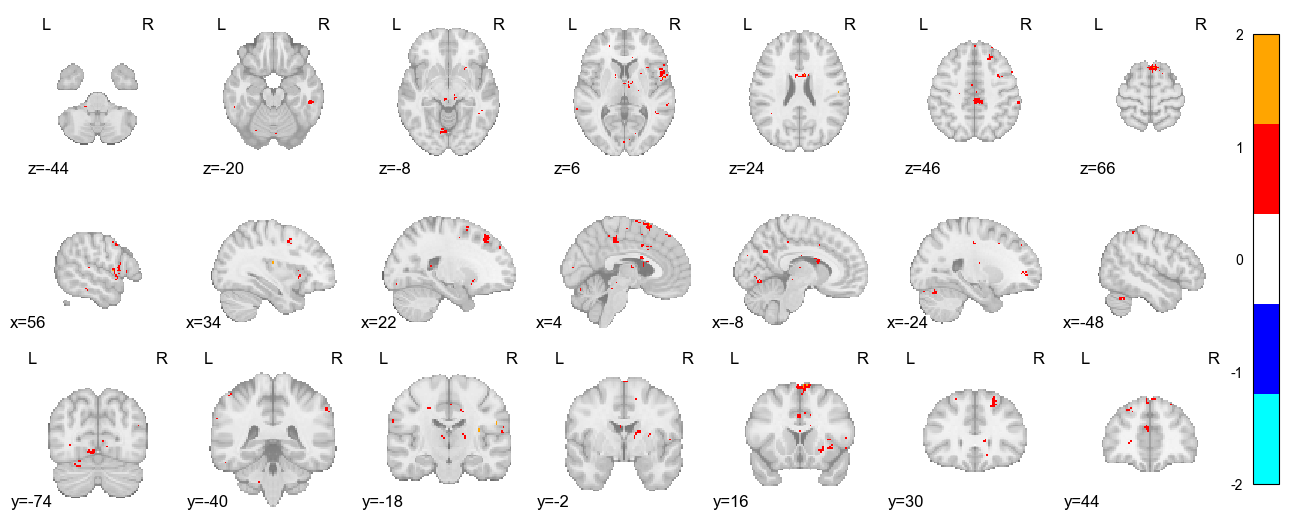

In [61]:
# X-M-Y
img = nib.load(f'{dir_mediation}/thres_Direct(Total-Indirect).nii.gz')
my_cmp = ListedColormap(['cyan', 'blue', 'white', 'white', 'red', 'orange'])
nip.plot_stat_map(img, cmap=my_cmp, display_mode='mosaic', vmin=-2, vmax=2)

In [18]:
beta = nib.load(f'{dir_mediation}/thres_Direct(Total-Indirect).nii.gz')
clust_table = get_clusters_table(stat_img=nib.load(f'{dir_mediation}/fdr_logq_Direct(Total-Indirect).nii.gz'),
                   stat_threshold=-np.log10(0.05),
                   cluster_threshold=0,
                   #min_distance=20
                   ) 
clust_table['region'] = 'N/A'
clust_table['yeo_network'] = 'N/A'

for i, row in clust_table.iterrows():
    x, y, z = row['X'], row['Y'], row['Z']
    region, yeo_nw, prob = get_difumo_label([x,y,z])
    clust_table.loc[row.name, 'region'] = region
    clust_table.loc[row.name, 'yeo_network'] = yeo_nw

clust_table

Cluster ID     X     Y     Z   Peak Stat  Cluster Size (mm3)  \
0           1  54.0 -18.0  24.0  302.371354                  16   
1           2   4.0  16.0  66.0  302.371354                  16   
2           3  52.0 -14.0  26.0    3.954974                   8   
3           4 -26.0 -70.0  12.0    3.954974                   8   
4           5   8.0  16.0  68.0    1.736484                   8   
5           6  56.0   2.0   6.0    1.676865                   8   
6           7  34.0 -18.0  18.0    1.676865                  16   
7           8   6.0   6.0  24.0    1.521254                   8   
8           9   8.0  28.0 -14.0    1.508936                   8   

                                              region       yeo_network  
0                 Lateral fissure posterior ramus RH      SalVentAttnA  
1  Cerebrospinal fluid (between superior frontal ...          DefaultB  
2                      Corticospinal tract middle RH  No network found  
3                      Calcarine sulcus mid-anterior           VisCent  
4         Superior frontal gyrus postero-superior LH      SalVentAttnA  
5                                  Heschl’s gyrus RH           SomMotA  
6                     Insula postero-inferior medial           SomMotA  
7                      Corpus callosum anterior body  No network found  
8           Ventromedial prefrontal cortex posterior           LimbicA

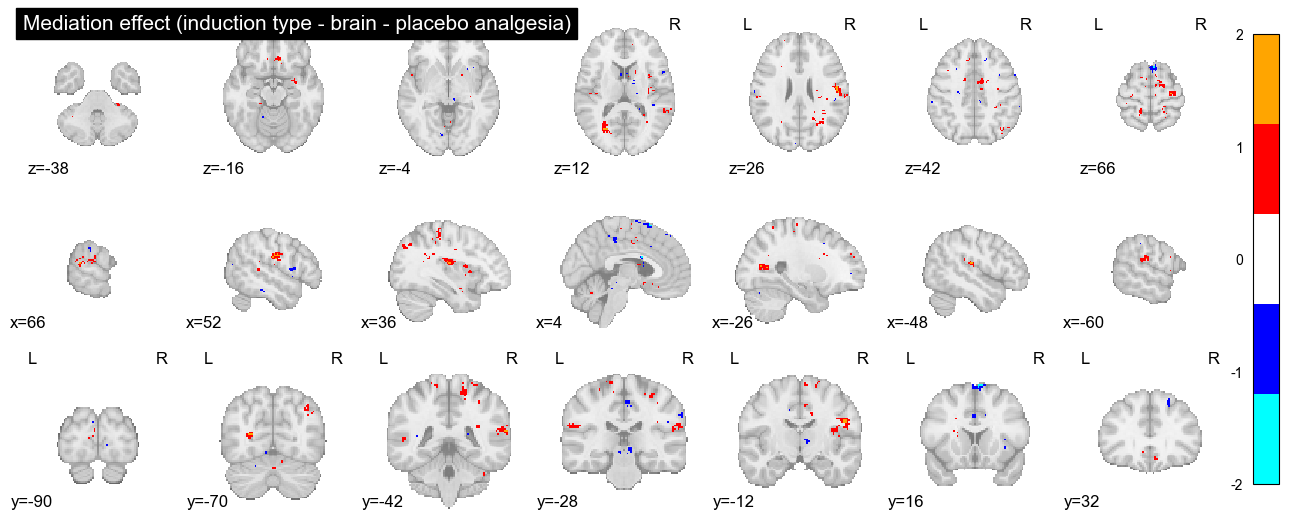

In [19]:
#ACME
img = nib.load(f'{dir_mediation}/thres_Indirect(ACME).nii.gz')
my_cmp = ListedColormap(['cyan', 'blue', 'white', 'white', 'red', 'orange'])
nip.plot_stat_map(img, cmap=my_cmp, display_mode='mosaic', title='Mediation effect (induction type - brain - placebo analgesia)', vmin=-2, vmax=2)

In [63]:
beta = nib.load(f'{dir_mediation}/beta_Indirect(ACME).nii.gz')
clust_table = get_clusters_table(stat_img=nib.load(f'{dir_mediation}/fdr_logq_Indirect(ACME).nii.gz'),
                   stat_threshold=-np.log10(0.05),
                   cluster_threshold=0,
                   min_distance=20
                   ) 
clust_table['region'] = 'N/A'
clust_table['yeo_network'] = 'N/A'

for i, row in clust_table.iterrows():
    x, y, z = row['X'], row['Y'], row['Z']
    region, yeo_nw, prob = get_difumo_label([x,y,z])
    clust_table.loc[row.name, 'region'] = region
    clust_table.loc[row.name, 'yeo_network'] = yeo_nw

clust_table

Cluster ID     X     Y     Z   Peak Stat  Cluster Size (mm3)  \
0            1  28.0 -20.0  66.0  303.517482                   8   
1            2 -60.0 -24.0  22.0  303.517482                   8   
2            3   4.0  16.0  68.0  303.517482                  40   
3            4   8.0  28.0 -14.0  303.517482                   8   
4            5  30.0 -18.0  54.0  303.517482                   8   
5            6  30.0 -18.0  16.0  303.517482                   8   
6            7  30.0 -20.0  18.0  303.517482                   8   
7            8   6.0   6.0  24.0  303.517482                  16   
8            9  32.0 -44.0  22.0  303.517482                  16   
9           10  32.0 -52.0  30.0  303.517482                   8   
10          11  26.0 -20.0  68.0  303.517482                   8   
11          12  34.0 -16.0  16.0  303.517482                  40   
12          13  40.0 -14.0  18.0  303.517482                   8   
13          14  42.0 -60.0  32.0  303.517482                   8   
14          15  50.0 -36.0   6.0  303.517482                   8   
15          16 -26.0 -70.0  12.0  303.517482                  24   
16          17  52.0 -16.0  28.0  303.517482                  64   
17          18  52.0 -18.0  24.0  303.517482                  32   
18          19 -26.0 -62.0  10.0  303.517482                   8   
19          20 -28.0 -64.0  10.0  303.517482                   8   
20          21  58.0   2.0   6.0  303.517482                   8   
21          22  34.0 -20.0  18.0  303.517482                  16   
22          23  16.0  -8.0  60.0  303.517482                   8   
23          24 -14.0 -48.0  68.0   10.436716                  24   
24          25 -62.0 -26.0  22.0    7.796989                   8   
25          26 -30.0 -68.0  10.0    4.620777                   8   
26          27   8.0   2.0  16.0    2.930909                   8   
27          28  28.0 -62.0  24.0    2.622499                   8   
28          29  32.0 -18.0  14.0    2.541821                  16   
29          30  22.0 -40.0  62.0    2.482398                   8   
30          31  18.0 -18.0   2.0    2.204112                   8   
31          32  56.0  10.0   2.0    2.019950                   8   
32          33 -48.0 -22.0  16.0    1.982738                  16   
33          34  28.0 -24.0  22.0    1.963997                   8   
34          35  66.0 -42.0  16.0    1.961757                  16   
35          36  32.0 -20.0  20.0    1.849120                   8   
36          37 -14.0   0.0  62.0    1.821701                   8   
37          38  14.0  -6.0  68.0    1.665938                   8   
38          39  12.0   2.0  60.0    1.638069                   8   
39          40  52.0 -14.0  22.0    1.533557                   8   
40          41   2.0  14.0  68.0    1.529207                   8   
41          42  -8.0   6.0  18.0    1.444915                   8   
42          43  10.0  26.0 -16.0    1.421332                   8   
43          44  54.0 -44.0  14.0    1.315327                   8   

                                         region       yeo_network  
0                       Superior frontal sulcus          DefaultB  
1                           Supramarginal gyrus      SalVentAttnA  
2                        Superior frontal gyrus          DefaultB  
3                       Superior frontal sulcus          DefaultB  
4                       Superior frontal sulcus          DefaultB  
5                       Superior frontal sulcus          DefaultB  
6                       Superior frontal sulcus          DefaultB  
7                       Superior frontal sulcus          DefaultB  
8                       Superior frontal sulcus          DefaultB  
9                       Superior frontal sulcus          DefaultB  
10                      Superior frontal sulcus          DefaultB  
11                      Superior frontal sulcus          DefaultB  
12                               Heschl’s gyrus           S

In [21]:
!fsleyes f'{dir_mediation}/thres_*.nii.gz'

unrecognized arguments: f/Users/tspisak/data/PIC_conditioning_withinsub_nodatalad/mediation_signflipped_signedquantile_studymod_results/beta_ACME.nii.gz
FSLeyes version 1.11.0
Usage: fsleyes [options] file [displayOpts] file [displayOpts] ...


In [1]:
get_difumo_label([8,15,66])

NameError: name 'get_difumo_label' is not defined